In [1]:
from fastai.metrics import error_rate
from fastai.widgets import *
from fastai.tabular import *
from fastai.vision import *
import os
%matplotlib inline

In [2]:
path = Path('data/ships')

In [3]:
classes = ['quantum', 'oasis', 'freedom', 'radiance', 'edge', 'solstice', 'millennium']

In [4]:
for c in classes:
    folder = c
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [10]:
for c in classes:
    os.rename('data/ships/' + c + '/download', 'data/ships/' + c + '/urls_' + c + '.csv')

In [5]:
for c in classes:
    file = 'urls_' + c + '.csv'
    folder = c
    dest = path/folder
    download_images(path/file, dest, max_pics=50)

In [6]:
for c in classes:
    verify_images(path/c, delete=True, max_size=500)

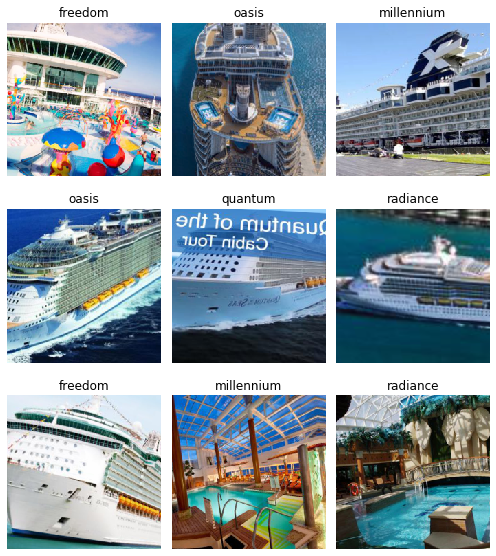

In [4]:
#data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),
#                                  size=224, num_workers=4).normalize(imagenet_stats)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224, bs=16).normalize(imagenet_stats)
data.classes
data.show_batch(rows=3, figsize=(7,8))

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.999183,3.182195,0.754098,00:05
1,2.193812,2.662146,0.540984,00:03
2,1.862525,2.043010,0.475410,00:03
3,1.550034,1.946948,0.491803,00:03


In [8]:
db = (ImageList.from_folder(path).split_none().label_from_folder().transform(get_transforms(), size=224)
      .databunch()
     )

In [9]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

In [10]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [11]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [4]:
#db = (ImageList.from_csv(path, 'cleaned.csv', folder='.').split_none().label_from_df()
#      .transform(get_transforms(), size=224).databunch())
#db = (ImageList.from_csv(path, 'cleaned.csv', folder='.').split_by_rand_pct(0.2).label_from_df()
#      .transform(get_transforms(), size=224).databunch().normalize(imagenet_stats))
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.').split_by_rand_pct(0.2).label_from_df()
      .transform(get_transforms(), size=224).databunch(bs=16).normalize(imagenet_stats))
#db = (ImageList.from_csv(path, 'cleaned.csv', folder='.').split_none().label_from_df()
#      .transform(get_transforms(), size=224).databunch().normalize(imagenet_stats))
#data = ImageDataBunch.from_csv(path, 'cleaned.csv', valid_pct=0.2, ds_tfms=get_transforms(),
#                                  size=224, bs=16).label_from_df().normalize(imagenet_stats)
#data = ImageDataBunch.from_csv(path, 'cleaned.csv', ds_tfms=get_transforms(), size=224);
#data = ImageDataBunch.from_csv(path, ds_tfms=get_transforms(), size=24);

In [5]:
print(db.classes)

['edge', 'freedom', 'millennium', 'oasis', 'quantum', 'radiance', 'solstice']


In [6]:
#learn = cnn_learner(db, models.resnet34, metrics=error_rate)
learn = cnn_learner(db, models.resnet50, metrics=error_rate)

In [50]:
#learn.fit_one_cycle(4)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,3.197004,3.377311,0.609756,00:02


In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


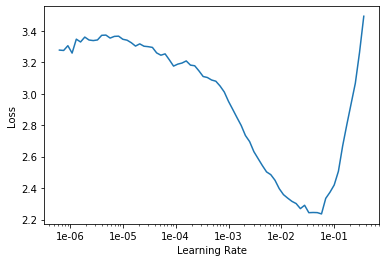

In [47]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2)) 

epoch,train_loss,valid_loss,error_rate,time
0,3.090915,4.892458,0.634146,00:02
1,2.204746,1.730770,0.536585,00:02
2,1.617635,1.420721,0.439024,00:02
3,1.311551,1.337868,0.390244,00:02


In [7]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,1e-2)) 

epoch,train_loss,valid_loss,error_rate,time
0,2.873709,3.312320,0.634146,00:04
1,2.189020,2.503489,0.463415,00:02
2,1.727435,1.673615,0.390244,00:02
3,1.377309,1.435157,0.390244,00:02
4,1.100800,1.387945,0.414634,00:02
5,0.952418,1.399724,0.414634,00:02


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

In [67]:
losses,idxs = interp.top_losses()

In [68]:
len(db.valid_ds)==len(losses)==len(idxs)

True

In [9]:
doc(interp.plot_top_losses)

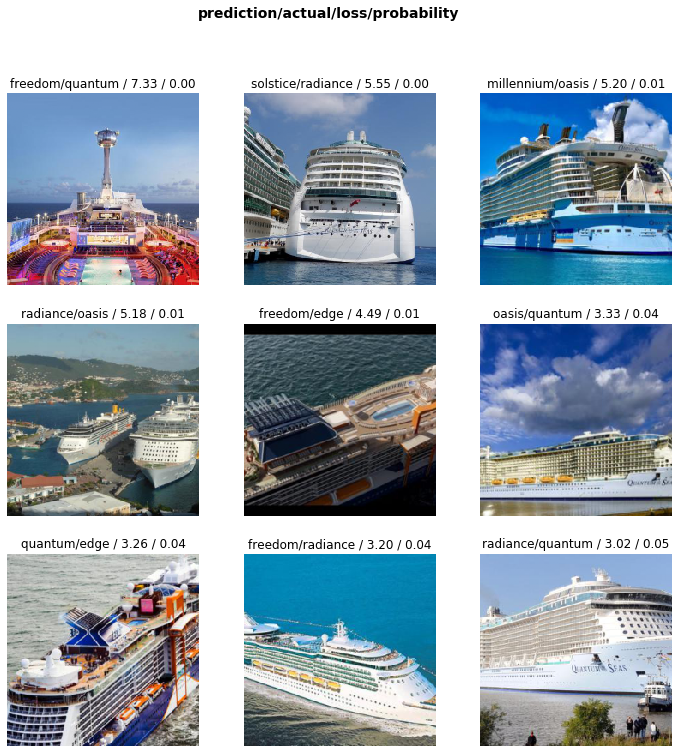

In [11]:
interp.plot_top_losses(9)
#interp._cl_int_top_plot_losses(9)
#interp._cl_int_top_plot_losses(k=5)

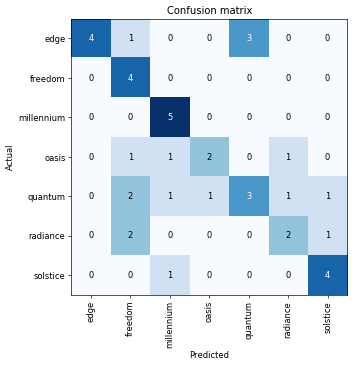

In [14]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)